In [437]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.layers import ReLU,LeakyReLU,ELU,PReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from transformers import BertTokenizer,TFBertModel
from tensorflow.keras.layers import LSTM,Bidirectional

In [438]:
df=pd.read_csv('dataset_train.csv')

In [439]:
df

,Type,Question
0,Admission,How do I apply for admission to Saras AI Inst...
1,Admission,What are the steps involved in getting accept...
2,Admission,What is the eligibility criteria for enrollin...
3,Admission,Can you explain the admission procedure for Sa...
4,Admission,What documents are required to apply to Saras...
...,...,...
227,Tuition fee and Scholarships,Are scholarships awarded based on financial n...
228,Tuition fee and Scholarships,Do I have to apply separately for financial a...
229,Tuition fee and Scholarships,What are the scholarship application deadline...
230,Tuition fee and Scholarships,Can I receive scholarships for short-term cou...


##BERT Approach

In [445]:
#Lets Use Bert
tokenizer= BertTokenizer.from_pretrained('bert-base-uncased')
bert_model=TFBertModel.from_pretrained('bert-base-uncased')

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are i

In [446]:
questions=df['Question'].tolist()
inputs=tokenizer(questions,return_tensors='tf',padding=True,truncation=True,max_length=512)

In [447]:
embeddings=bert_model(inputs['input_ids'])['last_hidden_state']

In [448]:
#for classification, take mean embeddings....
X=tf.reduce_mean(embeddings,axis=1)
X.shape

TensorShape([232, 768])

## Encoding the Y !

In [458]:
y_raw=df['Type']
# y_raw

Label Encoding

In [459]:
le=LabelEncoder()
y_le=le.fit_transform(y_raw)
# y_le

One Hot Encoding

In [460]:
ohe=OneHotEncoder()
y_ohe=ohe.fit_transform(y_raw.values.reshape(-1,1))
# y_test2=ohe.transform(y_test2[0].values.reshape(-1,1))
# print(y_ohe.toarray())

In [461]:
# print(y_test2.shape)

Selection Between Label and One Hot encoding
----------------------
Also accordingly need to make changes in the Output Layer

In [462]:
#One Hot
y=pd.DataFrame(y_ohe.toarray())
#-------
#Label
# y=pd.DataFrame(y_le)

In [463]:
#If Label Encoding is used
# y=y.rename(columns={0:'y1',1:'y2',2:'y3',3:'y4',4:'y5',5:'y6'})

## Train Test Split

In [464]:
X=X.numpy()

In [465]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.33)

In [466]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [467]:
time_steps=1
samples = X_train.shape[0]
features=X_train.shape[1]

X_train=X_train.reshape(samples,time_steps,features)
X_test=X_test.reshape(X_test.shape[0],time_steps,X_test.shape[1])

## THE ANN Approach

In [468]:
#Early Stopping
stopper=EarlyStopping(
    monitor='val_loss',
    min_delta=0.1,
    patience=5,
    verbose=2,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
)

In [469]:
# # model=Sequential()

# ## Input Layer , 20 features.
# model.add(Dense(units=20,activation='relu'))

# # 1st Hidden Layer
# model.add(Dense(units=28,activation='relu'))
# model.add(Dropout(0.3))

# #2nd Hidden Layer
# model.add(Dense(units=32,activation='relu'))
# model.add(Dropout(0.24))

# #3rd hidden layer
# model.add(Dense(units=26,activation='relu'))
# model.add(Dropout(0.35))

# #Output Layer
# model.add(Dense(units=5,activation='softmax'))

learning=0.01
opt=Adam(learning_rate=learning)

# #Optimizer and Loss function
# model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
# model_history=model.fit(X_train,y_train,batch_size=5,epochs=100,validation_split=0.33,callbacks=stopper)

In [470]:
# model_history.history.keys()

In [471]:
# plt.plot(model_history.history['accuracy'])
# plt.plot(model_history.history['val_accuracy'])
# plt.xlabel('Epochs')
# plt.legend(['Train','Validation'])
# plt.show()
# plt.plot(model_history.history['loss'])
# plt.plot(model_history.history['val_loss'])
# plt.xlabel('Epochs')
# plt.legend(['Train','Validation'])
# plt.show()

In [472]:
# y_pred=model.predict(X_test)
# y_pred_op=np.argmax(y_pred,axis=1)
# y_test_op=np.argmax(y_test,axis=1)

# acc_score=accuracy_score(y_pred_op,y_test_op)

# cm=confusion_matrix(y_pred_op,y_test_op)

# cr=classification_report(y_pred_op,y_test_op)
# print(cr)

In [473]:
# # Reshape X_train and X_test for LSTM
# samples, features = X_train.shape

# X_train = X_train.reshape(samples, 1, features)
# X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])




# opt = Adam(learning_rate=0.001)


## Bidirectional LSTM approach

In [474]:
model=Sequential()

In [475]:
#adding the lstm layer
model.add(Bidirectional(LSTM(units=768,return_sequences=False,dropout=0.3,recurrent_dropout=0.3)))

model.add(Dense(units=384,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=192,activation='relu'))
model.add(Dropout(0.2))

# model.add(Dense(units=96,activation='relu'))
# model.add(Dropout(0.35))

model.add(Dense(units=48,activation='relu'))
model.add(Dropout(0.2))

# model.add(Dense(units=24,activation='relu'))
# model.add(Dropout(0.5))

# model.add(Dense(units=12,activation='relu'))
# model.add(Dropout(0.4))

model.add(Dense(units=5,activation='softmax'))
model.add(Dropout(0.2))

# model.add(Dense(units=3,activation='relu'))
# model.add(Dropout(0.4))

# #adding the output layer
# model.add(Dense(units=1,activation='softmax'))

In [476]:
# optimizer and loss function
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional_9 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_45 (Dropout)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_46 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_46 (Dropout)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_47 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_47 (Dropout)                 │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [477]:
#Lets Train the Model
model_history=model.fit(X_train,y_train,callbacks=stopper,epochs=120)

Epoch 1/120
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.3162 - loss: 4.5815
Epoch 2/120
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6205 - loss: 3.4576
Epoch 3/120
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.6562 - loss: 1.5398

/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6897 - loss: 2.4203
Epoch 4/120
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6828 - loss: 3.9819
Epoch 5/120
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6897 - loss: nan
Epoch 6/120
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7223 - loss: 3.0790
Epoch 7/120
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8058 - loss: 2.8046
Epoch 8/120
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7524 - loss: 3.7483
Epoch 9/120
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7763 - loss: 3.1844
Epoch 10/120
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7147 - loss: 4.5169
Epoch 11/120
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7686 - loss: 3.4827
Epoch 12/120
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8122 - loss: 2.9479
Epoch 13/120
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7620 - loss: 3.4624
Epoch 14/120
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7780 - loss: 3.3602
Ep

In [478]:
print(df.isnull().sum())

Type        0
Question    0
dtype: int64


In [479]:
model_history.history.keys()

dict_keys(['accuracy', 'loss'])

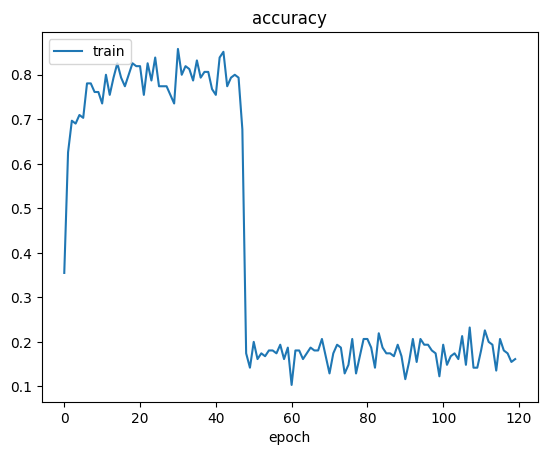

In [480]:
## Summary history for accuracy
plt.plot(model_history.history['accuracy'])
# plt.plot(model_history.history['val_accuracy'])
plt.title("accuracy")
plt.xlabel("epoch")
plt.legend(['train','test'],loc='upper left')
plt.show()

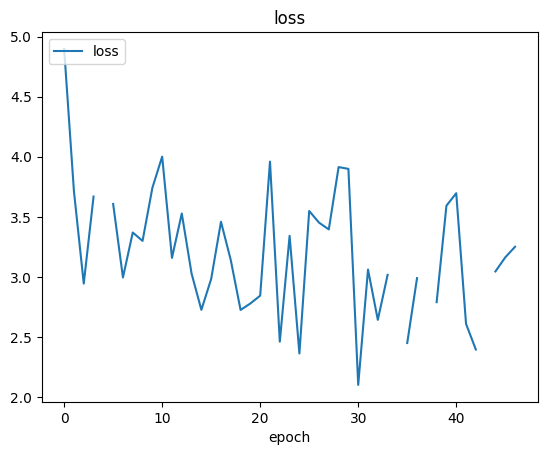

In [481]:
## Summary history for accuracy
plt.plot(model_history.history['loss'])
# plt.plot(model_history.history['val_accuracy'])
plt.title("loss")
plt.xlabel("epoch")
plt.legend(['loss','test'],loc='upper left')
plt.show()

In [482]:
y_pred=model.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 163ms/step


In [483]:
y_pred=np.argmax(y_pred,axis=1)
# y_test=np.argmax(y_test,axis=1)

In [484]:
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]


In [485]:
input_op=["How can i apply for scolarship in sars"]
question_op=input_op
inputs_op=tokenizer(question_op,return_tensors='tf',padding=True,truncation=True,max_length=512)
embedding_op=bert_model(inputs_op['input_ids'])['last_hidden_state']

X_op=tf.reduce_mean(embedding_op,axis=1)
X_op.shape
X_op=X_op.numpy()

time_steps=1
samples = X_op.shape[0]
features=X_op.shape[1]

X_op=X_op.reshape(X_op.shape[0],time_steps,X_op.shape[1])
X_op.shape

(1, 1, 768)

In [486]:
y_op=model.predict(X_op)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


In [487]:
y_op=np.argmax(y_op,axis=1)

In [488]:
y_op[0]

0

In [489]:
ohe.categories_[0]

array(['Accreditation & Recognition', 'Admission', 'Career Services',
       'Curriculum and Faculty', 'Tuition fee and Scholarships'],
      dtype=object)

In [490]:
ohe.categories_[0][y_op]

array(['Accreditation & Recognition'], dtype=object)